# AI DELIVERABLE 2

### Table of contents
1. [Dataset Loading and Initial Analysis](#1.-Dataset-Loading-and-Initial-Analysis)
2. [Data Merging and Comprehensive Analysis](#2.-Data-Merging-and-Comprehensive-Analysis)
3. [Data Imputation Process](#3.-Data-Imputation-Process)
4. [Data Encoding Process](#4.-Data-Encoding-Process)
5. [Feature Scaling](#5.-Feature-Scaling)
6. [Feature Selection](#6.-Feature-Selection)
7. [Model Evaluation and Selection](#7.-Model-Evaluation-and-Selection)
8. [Hyperparameter Tuning](#8.-Hyperparameter-Tuning)
9. [Fitting the Model and Performance Evaluation](#9.-Fitting-the-Model-and-Performance-Evaluation)
10. [Cross Validation in Model Evaluation](#10.-Cross-Validation-in-Model-Evaluation)
11. [Performance Analysis of Classifiers](#11.-Performance-Analysis-of-Classifiers)
12. [Interpretation of Results](#12.-Interpretation-of-Results)


# 1. Dataset Loading and Initial Analysis

This section focuses on loading the individual datasets and providing a concise summary of each. We'll examine key characteristics such as the number of rows and columns, column names, data types, and missing values for each dataset.

The process involves:
1. Defining file paths for each dataset
2. Creating a function to summarize dataset properties
3. Loading each dataset and applying the summary function
4. Displaying an overview of all datasets

This initial analysis helps us understand the structure and content of our data before proceeding with merging and further processing.


In [48]:
import pandas as pd

# File paths
file_paths = {
    "employee_survey_data": "employee_survey_data.csv",
    "general_data": "general_data.csv",
    "manager_survey_data": "manager_survey_data.csv"
}

# Function to provide a concise summary of each dataset
def summarize_dataset(df, name):
    print(f"\nDataset: {name}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Columns: {', '.join(df.columns)}")
    print(f"Data types:\n{df.dtypes.value_counts().to_string()}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print("-" * 50)

# Load and summarize each dataset
datasets = {}
for name, path in file_paths.items():
    datasets[name] = pd.read_csv(path)
    summarize_dataset(datasets[name], name)

print("\nDataset Overview Complete")



Dataset: employee_survey_data
Number of rows: 4410
Number of columns: 4
Columns: EmployeeID, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
Data types:
float64    3
int64      1
Missing values: 83
--------------------------------------------------

Dataset: general_data
Number of rows: 4410
Number of columns: 24
Columns: Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager
Data types:
int64      14
object      8
float64     2
Missing values: 28
--------------------------------------------------

Dataset: manager_survey_data
Number of rows: 4410
Number of columns: 3
Columns: EmployeeID, JobInvolvement, PerformanceRating
Data types:
int64    3
Missing values: 0
----------------

# 2. Data Merging and Comprehensive Analysis

In this section, we merge the individual datasets and perform a more detailed analysis of the combined data. The process includes:

1. Loading all datasets
2. Merging datasets based on the 'EmployeeID' column
3. Creating a function to describe the merged dataset in detail
4. Analyzing the merged data, including:
   - Overall dimensions
   - Column types
   - Missing values
   - Summary statistics for numeric columns
   - Overview of top categorical columns
5. Saving the merged dataset for future use

This comprehensive analysis provides deeper insights into our combined dataset, setting the stage for subsequent data preprocessing and modeling steps.


In [50]:
import pandas as pd
import numpy as np



# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Merge datasets
merged_data = datasets["employee_survey_data"].merge(datasets["general_data"], on="EmployeeID", how="inner")
merged_data = merged_data.merge(datasets["manager_survey_data"], on="EmployeeID", how="inner")

# Function to describe the merged dataset
def describe_merged_data(df):
    print("\nMerged Dataset Description:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"\nColumn types:\n{df.dtypes.value_counts().to_string()}")
    print(f"\nMissing values:\n{df.isnull().sum().sort_values(ascending=False).head().to_string()}")
    print("\nNumeric columns summary:")
    print(df.describe().transpose().to_string())
    print("\nTop 5 categorical columns (by number of unique values):")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in sorted(categorical_columns, key=lambda x: df[x].nunique(), reverse=True)[:5]:
        print(f"{col}: {df[col].nunique()} unique values")

# Describe the merged dataset
describe_merged_data(merged_data)

# Save the merged dataset
merged_data.to_csv("merged_data.csv", index=False)
print("\nData merged successfully and saved to 'merged_data.csv'")



Merged Dataset Description:
Number of rows: 4410
Number of columns: 29

Column types:
int64      16
object      8
float64     5

Missing values:
WorkLifeBalance            38
EnvironmentSatisfaction    25
JobSatisfaction            20
NumCompaniesWorked         19
TotalWorkingYears           9

Numeric columns summary:
                          count          mean           std      min       25%      50%       75%       max
EmployeeID               4410.0   2205.500000   1273.201673      1.0   1103.25   2205.5   3307.75    4410.0
EnvironmentSatisfaction  4385.0      2.723603      1.092756      1.0      2.00      3.0      4.00       4.0
JobSatisfaction          4390.0      2.728246      1.101253      1.0      2.00      3.0      4.00       4.0
WorkLifeBalance          4372.0      2.761436      0.706245      1.0      2.00      3.0      3.00       4.0
Age                      4410.0     36.923810      9.133301     18.0     30.00     36.0     43.00      60.0
DistanceFromHome         4410.

# 3. Data Imputation Process

In this section, we address missing values in our dataset using advanced imputation techniques to ensure completeness for analysis and modeling.

1. **Analyze Missing Values Before Imputation**: We start by identifying the number of missing values for each column to understand the extent of the issue.

2. **Impute Numeric Data Using KNN Imputer**: For numeric columns, we utilize the K-Nearest Neighbors (KNN) imputer. This method fills in missing values based on the average of the nearest neighbors, leveraging relationships between data points.

3. **Impute Categorical Data Using Random Forest**: For categorical columns with missing values, we employ a Random Forest Classifier. This method predicts missing values based on other features in the dataset, capturing complex relationships and interactions. For each categorical column with missing values, we create a temporary dataset with dummy variables for other categorical features and train a Random Forest model on known values to predict the missing ones.

4. **Analyze Missing Values After Imputation**: After performing imputation for both numeric and categorical columns, we analyze the dataset again to confirm that all missing values have been addressed.

By completing this imputation process, we prepare our dataset for further data processing and modeling steps, enhancing the reliability of our predictions regarding employee attrition.


In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

print("Step 1: Analyzing missing values before imputation")
print(merged_data.isnull().sum())
print("\nTotal missing values:", merged_data.isnull().sum().sum())

# Separate numeric and categorical columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns

print("\nStep 2: Imputing numeric data using KNN Imputer")
print("Numeric columns:", numeric_columns.tolist())
knn_imputer = KNNImputer(n_neighbors=5)
merged_data[numeric_columns] = knn_imputer.fit_transform(merged_data[numeric_columns])
print("KNN Imputation completed for numeric columns")

# Function to impute categorical data using Random Forest
def impute_categorical(df, column):
    print(f"\nImputing categorical column: {column}")
    df_temp = df.copy()
    df_temp = pd.get_dummies(df_temp, columns=[col for col in categorical_columns if col != column])
    
    known = df_temp[df_temp[column].notnull()]
    unknown = df_temp[df_temp[column].isnull()]
    
    X_train = known.drop(columns=[column])
    y_train = known[column]
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    imputed_values = clf.predict(unknown.drop(columns=[column]))
    df.loc[df[column].isnull(), column] = imputed_values
    
    print(f"Imputation completed for {column}")
    return df

print("\nStep 3: Imputing categorical data using Random Forest")
print("Categorical columns:", categorical_columns.tolist())
for col in categorical_columns:
    if merged_data[col].isnull().sum() > 0:
        merged_data = impute_categorical(merged_data, col)

print("\nStep 4: Analyzing missing values after imputation")
print(merged_data.isnull().sum())
print("\nTotal missing values after imputation:", merged_data.isnull().sum().sum())

print("\nImputation process completed successfully!")


Step 1: Analyzing missing values before imputation
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

Total missing values: 111

Step 2: Imputing numeric data using KN

In [53]:
merged_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1.0,3.0,4.0,2.0,51.0,No,Travel_Rarely,Sales,6.0,2.0,...,11.0,8.0,0.0,1.0,6.0,1.0,0.0,0.0,3.0,3.0
1,2.0,3.0,2.0,4.0,31.0,Yes,Travel_Frequently,Research & Development,10.0,1.0,...,23.0,8.0,1.0,6.0,3.0,5.0,1.0,4.0,2.0,4.0
2,3.0,2.0,2.0,1.0,32.0,No,Travel_Frequently,Research & Development,17.0,4.0,...,15.0,8.0,3.0,5.0,2.0,5.0,0.0,3.0,3.0,3.0
3,4.0,4.0,4.0,3.0,38.0,No,Non-Travel,Research & Development,2.0,5.0,...,11.0,8.0,3.0,13.0,5.0,8.0,7.0,5.0,2.0,3.0
4,5.0,4.0,1.0,3.0,32.0,No,Travel_Rarely,Research & Development,10.0,1.0,...,12.0,8.0,2.0,9.0,2.0,6.0,0.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406.0,4.0,1.0,3.0,42.0,No,Travel_Rarely,Research & Development,5.0,4.0,...,17.0,8.0,1.0,10.0,5.0,3.0,0.0,2.0,3.0,3.0
4406,4407.0,4.0,4.0,3.0,29.0,No,Travel_Rarely,Research & Development,2.0,4.0,...,15.0,8.0,0.0,10.0,2.0,3.0,0.0,2.0,2.0,3.0
4407,4408.0,1.0,3.0,3.0,25.0,No,Travel_Rarely,Research & Development,25.0,2.0,...,20.0,8.0,0.0,5.0,4.0,4.0,1.0,2.0,3.0,4.0
4408,4409.0,4.0,1.0,3.0,42.0,No,Travel_Rarely,Sales,18.0,2.0,...,14.0,8.0,1.0,10.0,2.0,9.0,7.0,8.0,2.0,3.0


# 4. Data Encoding Process

In this section, we will encode the categorical variables in our dataset to prepare it for machine learning models.

1. **Identify Categorical Variables**: We first identify which columns in our dataset are categorical in nature.

2. **One-Hot Encoding**: For nominal categorical variables (those without an inherent order), we apply one-hot encoding. This method creates binary columns for each category, allowing models to interpret them as separate features.

3. **Label Encoding**: For the target variable 'Attrition', we apply label encoding. This method converts categorical labels into numerical values, which is necessary for models that require numerical input.

By completing this encoding process, we ensure that our dataset is fully prepared for modeling and analysis.


In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
print("Identified categorical columns:", categorical_columns.tolist())

# One-hot encoding for nominal variables
print("\nStep 1: Applying One-Hot Encoding")
merged_data_encoded = pd.get_dummies(merged_data, columns=[col for col in categorical_columns if col != 'Attrition'])
print("One-Hot Encoding completed. New shape after encoding:", merged_data_encoded.shape)

# Label encoding for the target variable 'Attrition'
print("\nStep 2: Applying Label Encoding to the target variable 'Attrition'")
le = LabelEncoder()
merged_data_encoded['Attrition'] = le.fit_transform(merged_data_encoded['Attrition'])
print("Label Encoding completed for 'Attrition'. Unique values:", merged_data_encoded['Attrition'].unique())

print("\nEncoding completed. Final shape of the dataset:", merged_data_encoded.shape)


Identified categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

Step 1: Applying One-Hot Encoding
One-Hot Encoding completed. New shape after encoding: (4410, 49)

Step 2: Applying Label Encoding to the target variable 'Attrition'
Label Encoding completed for 'Attrition'. Unique values: [0 1]

Encoding completed. Final shape of the dataset: (4410, 49)


In [56]:
merged_data_encoded

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,EmployeeCount,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,1.0,3.0,4.0,2.0,51.0,0,6.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,True
1,2.0,3.0,2.0,4.0,31.0,1,10.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,True,True
2,3.0,2.0,2.0,1.0,32.0,0,17.0,4.0,1.0,4.0,...,False,False,False,False,True,False,False,True,False,True
3,4.0,4.0,4.0,3.0,38.0,0,2.0,5.0,1.0,3.0,...,False,False,False,False,False,False,False,True,False,True
4,5.0,4.0,1.0,3.0,32.0,0,10.0,1.0,1.0,1.0,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406.0,4.0,1.0,3.0,42.0,0,5.0,4.0,1.0,1.0,...,False,False,False,True,False,False,False,False,True,True
4406,4407.0,4.0,4.0,3.0,29.0,0,2.0,4.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,True
4407,4408.0,1.0,3.0,3.0,25.0,0,25.0,2.0,1.0,2.0,...,False,False,False,False,True,False,False,True,False,True
4408,4409.0,4.0,1.0,3.0,42.0,0,18.0,2.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,True


# 5. Feature Scaling

Feature scaling is a critical preprocessing step in machine learning that normalizes the range of independent variables or features in a dataset. It ensures that each feature contributes equally to the model's performance, especially in algorithms sensitive to the scale of input data.

## Why Use RobustScaler?

In this analysis, we specifically use **RobustScaler** for scaling our features due to the nature of our dataset, which consists of employee data. The choice of this scaler is particularly relevant for the following reasons:

1. **Sensitivity to Outliers**:
   - Employee data often contains outliers resulting from extreme values in salary, age, or performance metrics. These outliers can skew results if we use scalers like StandardScaler or MinMaxScaler, which rely on mean and standard deviation.
   - RobustScaler mitigates this issue by using the median and interquartile range (IQR) to scale features. This approach reduces the influence of outliers and provides a more accurate representation of the central tendency and dispersion of the data.

2. **Real-World Data Characteristics**:
   - Real-world datasets frequently exhibit variability and noise. By applying RobustScaler, we ensure that our model training is less affected by extreme values, leading to more reliable predictions.
   - This is particularly important in employee attrition analysis, where decisions based on skewed data could lead to incorrect conclusions about employee behavior and retention strategies.

## Mathematical Formulation

The formula for scaling a feature $x$ using **RobustScaler** is as follows:

$$
x_{\text{scaled}} = \frac{x - \text{median}(X)}{\text{IQR}(X)}
$$


Where:
- $x$ is the original value of the feature.
- $\text{median}(X)$ is the median of the feature values in the dataset.
- $\text{IQR}(X)$ is the interquartile range, calculated as:

$$
\text{IQR}(X) = Q_3 - Q_1
$$


Where:
- $Q_1$ is the first quartile (25th percentile).
- $Q_3$ is the third quartile (75th percentile).

This scaling method centers the data around zero while scaling it according to its IQR, making it robust against outliers.

## Conclusion

By applying RobustScaler to our employee dataset, we aim to create a more robust predictive model capable of handling the inherent variability of real-world data effectively. This approach helps ensure that our analysis remains valid and actionable despite any outlier influences.


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Assuming 'merged_data_encoded' is your DataFrame after encoding
if 'Attrition' not in merged_data_encoded.columns:
    raise KeyError("'Attrition' column not found in merged_data_encoded.")

# Step 1: Define features and target variable
target_variable = 'Attrition'
identifier_columns = merged_data_encoded.select_dtypes(include=['object']).columns.tolist()
X = merged_data_encoded.drop(columns=[target_variable] + identifier_columns)  # Features
y = merged_data_encoded[target_variable]  # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scaling Block - Apply RobustScaler
scaler = RobustScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store the scaled results in a dictionary
scaled_results = {
    "RobustScaler": {
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train,
        "y_test": y_test
    }
}

# Display shapes of the scaled datasets
print(f"RobustScaler - Training set shape: {X_train_scaled.shape}, Test set shape: {X_test_scaled.shape}")


RobustScaler - Training set shape: (3528, 48), Test set shape: (882, 48)


# 6. Feature Selection

Support Vector Machine (SVM) with **L1 regularization** is an effective technique for feature selection in machine learning, especially for classification tasks. It helps identify important features while regularizing the model to avoid overfitting, leading to better model generalization.

## Why Use SVM for Feature Selection?

1. **Automatic Feature Selection**:
   - **SVM with L1 regularization** performs feature selection by driving the coefficients of irrelevant or less important features to zero. This enables the model to focus only on the most relevant features, making it particularly useful for high-dimensional datasets where manual feature selection is challenging.

2. **Regularization**:
   - The **L1 penalty** in the objective function encourages sparsity by shrinking some of the coefficients to zero. This helps reduce the model's complexity and prevents overfitting, ensuring that the model generalizes well to unseen data.

3. **Interpretability**:
   - By inspecting the coefficients obtained from **SVM with L1 regularization**, we can easily identify the most important features for prediction. Features with non-zero coefficients are selected, while features with zero coefficients are discarded.

## Mathematical Formulation

The objective function for **SVM with L1 regularization** can be expressed as:

$$
\min_{\beta} \left[ \frac{1}{2} \|\beta\|^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right]
$$

Where:
- $ \|\beta\|^2 $ is the **L2 norm** of the coefficients, which prevents the coefficients from becoming too large and overfitting.
- $ \lambda $ is the regularization parameter that controls the strength of the **L1 regularization**. A larger value of $ \lambda $ forces more coefficients to zero, effectively performing feature selection.
- $ |\beta_j| $ represents the **absolute value** of the coefficients, which is the L1 penalty term that causes some coefficients to be exactly zero.

In this formulation:
- **SVM** tries to find the optimal hyperplane that maximizes the margin between the classes, while the L1 regularization term forces the coefficients of irrelevant features to zero, effectively selecting important features.
- The regularization prevents overfitting by penalizing the complexity of the model (the number of non-zero coefficients).

## Application of RobustScaler

Before applying **SVM with L1 regularization**, we scaled the features using **RobustScaler**. This scaler is particularly effective in the presence of outliers because it uses the **median** and **interquartile range (IQR)** to scale the data, rather than the mean and standard deviation. This makes it more robust to extreme values, ensuring that outliers do not disproportionately affect the model's performance.


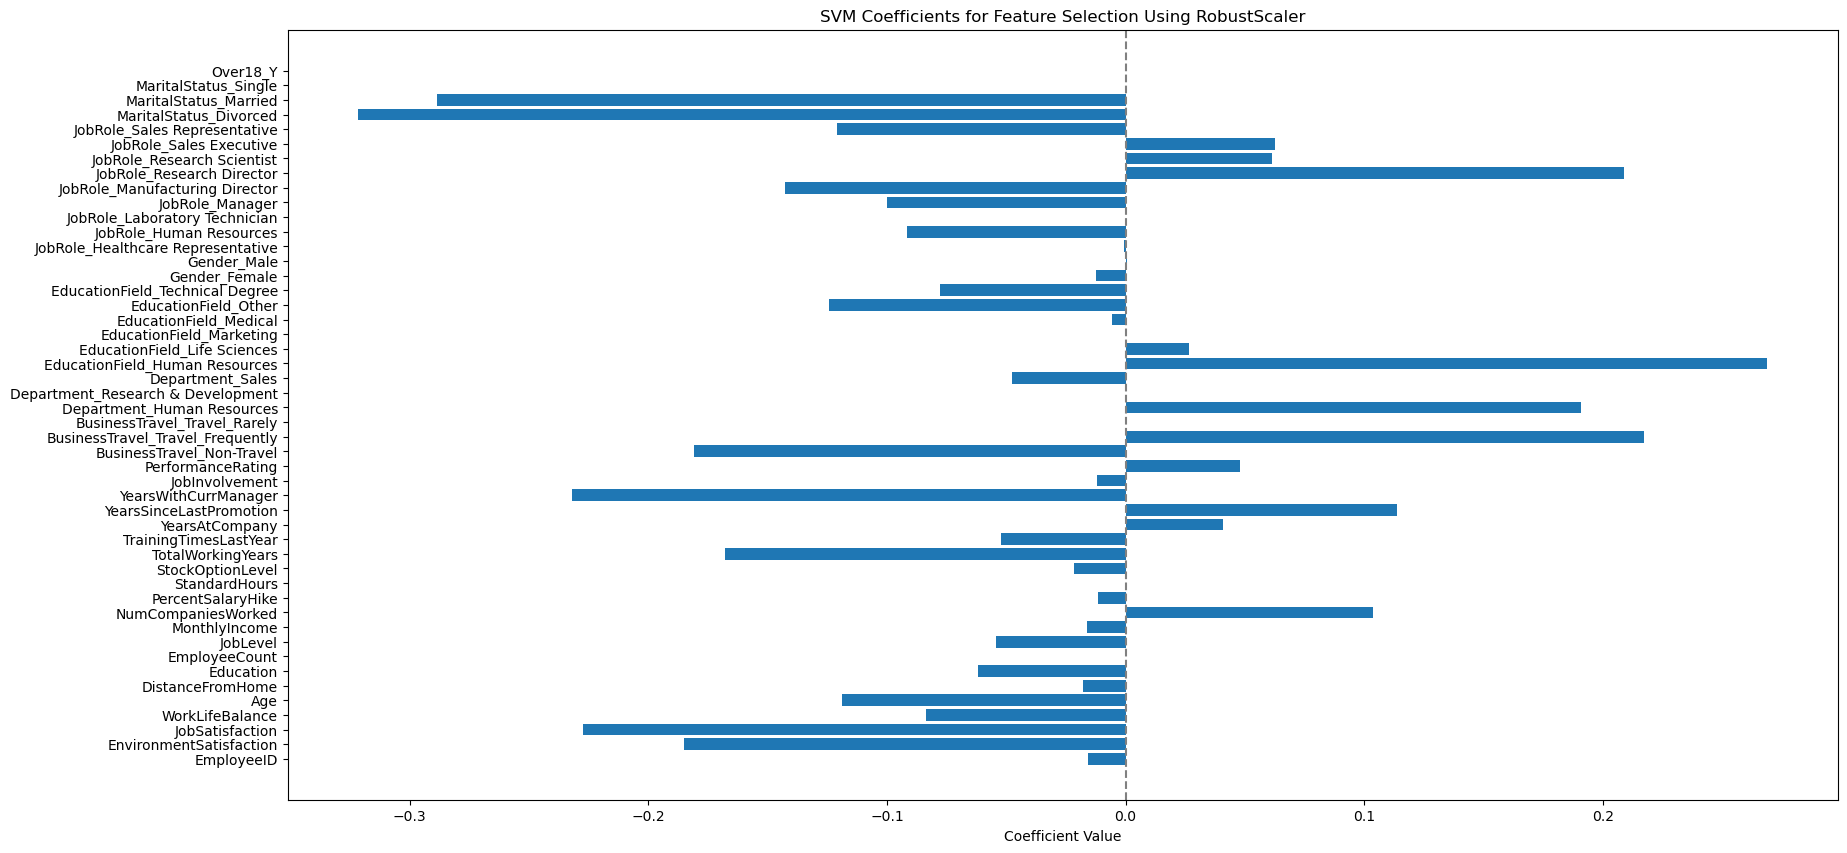

Included Features:
['EmployeeID' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'WorkLifeBalance' 'Age' 'DistanceFromHome' 'Education' 'JobLevel'
 'MonthlyIncome' 'NumCompaniesWorked' 'PercentSalaryHike'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'YearsAtCompany' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'JobInvolvement' 'PerformanceRating' 'BusinessTravel_Non-Travel'
 'BusinessTravel_Travel_Frequently' 'Department_Human Resources'
 'Department_Sales' 'EducationField_Human Resources'
 'EducationField_Life Sciences' 'EducationField_Medical'
 'EducationField_Other' 'EducationField_Technical Degree' 'Gender_Female'
 'Gender_Male' 'JobRole_Healthcare Representative'
 'JobRole_Human Resources' 'JobRole_Manager'
 'JobRole_Manufacturing Director' 'JobRole_Research Director'
 'JobRole_Research Scientist' 'JobRole_Sales Executive'
 'JobRole_Sales Representative' 'MaritalStatus_Divorced'
 'MaritalStatus_Married']

Excluded Features:
['EmployeeCount' 'StandardHours' 'B

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Assuming 'merged_data_encoded' is your DataFrame after encoding
if 'Attrition' not in merged_data_encoded.columns:
    raise KeyError("'Attrition' column not found in merged_data_encoded.")

# Step 1: Define features and target variable
target_variable = 'Attrition'
identifier_columns = merged_data_encoded.select_dtypes(include=['object']).columns.tolist()
X = merged_data_encoded.drop(columns=[target_variable] + identifier_columns)  # Features
y = merged_data_encoded[target_variable]  # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scaling Block - Apply RobustScaler
scaler = RobustScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store the scaled results in a dictionary
scaled_results = {
    "RobustScaler": {
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train,
        "y_test": y_test
    }
}

# Get the feature names from X_train
feature_names = X_train.columns.tolist()  # Assuming X_train is a pandas DataFrame

# Step 4: Apply SVM with L1 regularization (LinearSVC) for feature selection
svm = LinearSVC(penalty='l1', dual=False, max_iter=5000)  # Increased the number of iterations to 5000
svm.fit(X_train_scaled, y_train)

# Get the coefficients from the SVM model
svm_coef = svm.coef_.flatten()  # Flatten the coefficients for easier handling

# Step 5: Plotting the coefficients
plt.figure(figsize=(20, 10))
plt.barh(range(len(svm_coef)), svm_coef)
plt.yticks(range(len(svm_coef)), feature_names)  # Use feature names on the y-axis
plt.xlabel('Coefficient Value')
plt.title('SVM Coefficients for Feature Selection Using RobustScaler')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at x=0 for reference
plt.show()

# Step 6: Identify included and excluded features based on non-zero coefficients
included_columns = np.array(feature_names)[np.abs(svm_coef) != 0]  # Features with non-zero coefficients
excluded_columns = np.array(feature_names)[np.abs(svm_coef) == 0]  # Features with zero coefficients

# Print the selected features (included and excluded)
print("Included Features:")
print(included_columns)

print("\nExcluded Features:")
print(excluded_columns)

# Feature importance (absolute values of coefficients)
importance = np.abs(svm_coef)

# Display the importance of each feature
print("\nFeature Importance (Absolute Coefficients):")
for feature, imp in zip(feature_names, importance):
    print(f"{feature}: {imp}")

# Output the variables exactly as in your previous code
selected_features = included_columns
num_selected_features = len(selected_features)

# Display the number of selected features
print(f"\nNumber of selected features: {num_selected_features}/{len(feature_names)}")


# 7. Model Evaluation and Selection

In this section, we will evaluate multiple classifiers to determine the best-performing model for our dataset. The process involves fitting each model, calculating performance metrics, selecting the best model based on the F1 score, and finally training that model on the entire training dataset.

## Steps Involved

### 1. Data Preparation
- **Splitting the Dataset**: The dataset is divided into training and testing sets using an 80-20 split. This allows us to train models on one portion of the data while evaluating their performance on unseen data.
- **Feature Scaling**: The features are scaled using `RobustScaler` to ensure that all features contribute equally to the model training process. This scaler is particularly useful for datasets with outliers as it uses the median and interquartile range for scaling.

### 2. Model Definition
A variety of classifiers are defined in a dictionary to ensure diverse evaluation:
- **Logistic Regression**: A linear model used for binary classification tasks.
- **Random Forest**: An ensemble method that constructs multiple decision trees for improved accuracy.
- **Support Vector Classifier (SVC)**: A powerful classifier that works well on both linear and non-linear data.
- **Decision Tree**: A non-linear model that makes decisions based on feature values.
- **K-Nearest Neighbors (KNN)**: An instance-based learning algorithm that classifies based on the closest training examples.
- **Gradient Boosting**: An ensemble technique that builds models sequentially to correct errors made by previous models.
- **Gaussian Naive Bayes**: A probabilistic classifier based on Bayes' theorem.

### 3. Model Evaluation
For each model:
- The model is fitted using the scaled training data.
- Predictions are made on the scaled test data.
- The F1 score is calculated, which balances precision and recall, making it a suitable metric for imbalanced datasets.
- A classification report is printed for each model, detailing precision, recall, F1 score, and support.

### 4. Model Selection
The best-performing model is selected based on the highest F1 score among all evaluated models. This ensures that we choose a model that not only performs well but also balances false positives and false negatives effectively.

### 5. Final Training
The selected best model is then trained on the entire scaled training dataset. This prepares the model for further steps, such as making predictions on new data or performing additional analyses.

## Conclusion
This systematic approach allows us to compare various classifiers effectively and select the one that provides the best performance based on F1 score. By training this selected model on the complete training dataset, we ensure it is well-prepared for future predictions or evaluations.


In [62]:
# Import necessary libraries for model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score

# Step 1: Use previously defined variables for scaled data and selected features
X_train_scaled = scaled_results["RobustScaler"]["X_train"]  # Scaled training features
X_test_scaled = scaled_results["RobustScaler"]["X_test"]    # Scaled test features
y_train = scaled_results["RobustScaler"]["y_train"]          # Training target variable
y_test = scaled_results["RobustScaler"]["y_test"]            # Test target variable

# Assuming 'selected_features' contains the names of selected features from Lasso regression
selected_feature_indices = [i for i, col in enumerate(X.columns) if col in selected_features]

# Filter the scaled training and test data to include only selected features
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Define a dictionary of diverse models to evaluate using selected features
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),  # Enable probability estimates for ROC AUC if needed
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Step 2: Evaluate each model and store their F1 scores using selected features
model_performance = {}

for name, model in models.items():
    # Fit the model on the scaled training data with selected features
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the test set with selected features
    y_pred = model.predict(X_test_selected)
    
    # Calculate F1 score for the current model
    f1 = f1_score(y_test, y_pred)
    
    # Store the performance metric
    model_performance[name] = f1
    
    # Print the classification report for the current model
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

# Step 3: Select the best model based on F1 score
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with F1 Score: {model_performance[best_model_name]:.4f}")

# Step 4: Train the best model on the entire training dataset with selected features
best_model.fit(X_train_selected, y_train)

# Now you can proceed with further steps using `best_model`



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       741
           1       0.52      0.18      0.26       141

    accuracy                           0.84       882
   macro avg       0.69      0.57      0.59       882
weighted avg       0.81      0.84      0.81       882


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.92      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       741
           1       0.91      0.37      0.53       141

    accuracy                          

RandomForestClassifier()

## Random Forest Classifier

The Random Forest classifier is an ensemble learning method that constructs multiple decision trees during training and combines their outputs to improve accuracy and control overfitting. It operates by creating a "forest" of decision trees, where each tree is trained on a random subset of the data and features. The final prediction is made by aggregating the predictions from all individual trees, typically through majority voting for classification tasks.

### Key Advantages of Random Forest

1. **Robustness**: Random Forest is less prone to overfitting compared to individual decision trees, making it suitable for complex datasets.
2. **Feature Importance**: It provides insights into feature importance, allowing users to understand which features contribute most to predictions.
3. **Versatility**: It can handle both classification and regression tasks effectively.
4. **Handling Missing Values**: Random Forest can maintain accuracy even when a large proportion of the data is missing.

Given its advantages, the Random Forest classifier is widely used in various applications, including finance, healthcare, and marketing.


# 8. Hyperparameter Tuning

Hyperparameter tuning is a critical step in the machine learning model development process. It involves adjusting the hyperparameters of a model—settings that are not learned from the data but are set prior to the training process—to optimize performance. Proper tuning can lead to better accuracy, improved generalization to unseen data, and overall enhanced model performance.

## Importance of Hyperparameter Tuning

1. **Model Performance**: Fine-tuning hyperparameters helps in finding the optimal configuration that maximizes the model's predictive accuracy.
2. **Overfitting Prevention**: Adjusting parameters such as tree depth and minimum samples per leaf can help mitigate overfitting, ensuring that the model generalizes well to new data.
3. **Efficiency**: Optimized hyperparameters can lead to faster convergence during training, reducing computational costs and time.

## Common Techniques for Hyperparameter Tuning

- **Grid Search**: This method exhaustively searches through a specified subset of hyperparameters. While thorough, it can be computationally expensive.
- **Randomized Search**: Instead of testing all combinations, this method samples a fixed number of parameter settings from specified distributions, making it faster and often just as effective.
- **Bayesian Optimization**: This advanced technique uses probabilistic models to find optimal hyperparameters more efficiently than grid or random search.
- **Cross-Validation**: A technique used during tuning to ensure that the model's performance is evaluated on different subsets of the data, providing a more reliable estimate of its generalization ability.

## Hyperparameter Tuning for Random Forest Classifier

The Random Forest classifier is an ensemble learning method that constructs multiple decision trees during training and combines their outputs for improved accuracy. Like any machine learning model, its performance can be significantly influenced by its hyperparameters.

### Key Hyperparameters for Tuning Random Forest

1. **n_estimators**:
   - **Description**: The number of trees in the forest. More trees generally lead to better performance but also increase computation time.
   - **Typical Values**: `[100, 200, 500, 1000]`

2. **max_depth**:
   - **Description**: The maximum depth of each tree. Limiting depth helps prevent overfitting.
   - **Typical Values**: `[None, 10, 20, 30]`

3. **min_samples_split**:
   - **Description**: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that only contain a few samples.
   - **Typical Values**: `[2, 5, 10]`

4. **min_samples_leaf**:
   - **Description**: The minimum number of samples required to be at a leaf node. This parameter helps ensure that leaf nodes contain a sufficient number of samples.
   - **Typical Values**: `[1, 2, 4]`

5. **max_features**:
   - **Description**: The number of features to consider when looking for the best split. This can help reduce overfitting by introducing randomness into the tree-building process.
   - **Typical Values**: `['auto', 'sqrt', 'log2']`

6. **bootstrap**:
   - **Description**: Indicates whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
   - **Typical Values**: `[True, False]`

### Tuning Process for Random Forest

1. **Define a Parameter Grid**: Create a grid or distribution of hyperparameters with various values to explore.
2. **Use Randomized Search or Grid Search**: Implement `RandomizedSearchCV` or `GridSearchCV` to evaluate different combinations of hyperparameters using cross-validation.
3. **Evaluate Model Performance Using Cross-Validation**: Use cross-validation to assess how well different hyperparameter combinations perform on unseen data.
4. **Select Optimal Hyperparameters Based on Performance Metrics**: Choose the combination that yields the best performance metrics (e.g., F1 score) and retrain the model using these parameters.

By following this structured approach to hyperparameter tuning for the Random Forest classifier, you can enhance its performance and reliability while ensuring efficient use of computational resources.


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define a smaller hyperparameter grid for faster tuning
param_distributions = {
    'n_estimators': [100, 200, 500],              # Limited number of trees
    'max_depth': [None, 10, 20],                  # Maximum depth options
    'min_samples_split': [2, 5],                  # Minimum samples required to split
    'min_samples_leaf': [1, 2],                   # Minimum samples required at a leaf node
    'max_features': ['sqrt'],                      # Number of features to consider when looking for the best split
    'bootstrap': [True]                           # Bootstrap samples used when building trees
}

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with Stratified K-Fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=10,                       # Fewer iterations for quicker results
                                   cv=cv,                            # Using Stratified K-Fold
                                   scoring='f1',                    # Scoring metric
                                   verbose=1,
                                   n_jobs=-1)                       # Use all available cores

# Fit RandomizedSearchCV on the scaled training data with selected features
random_search.fit(X_train_selected, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


# 9. Fitting the Model and Performance Evaluation

After tuning the hyperparameters for the Random Forest classifier, we proceed to fit the model using the selected features from our dataset. This process involves training the model on the training data and then evaluating its performance on a separate test set.

## Model Fitting

1. **Initialization**: The Random Forest model is initialized with the best hyperparameters identified during the tuning process. These parameters are crucial for optimizing the model's performance and include:
   - `n_estimators`: The number of trees in the forest.
   - `max_depth`: The maximum depth of each tree.
   - `min_samples_split`: The minimum number of samples required to split an internal node.
   - `min_samples_leaf`: The minimum number of samples required at a leaf node.
   - `max_features`: The number of features to consider when looking for the best split.
   - `bootstrap`: Indicates whether bootstrap samples are used when building trees.

2. **Training**: The model is fitted on the training data (`X_train_selected` and `y_train`). This step involves learning from the data by constructing multiple decision trees based on random subsets of both data points and features.

## Performance Evaluation

To assess how well our Random Forest model performs, we use several evaluation metrics:

### 1. Confusion Matrix

The confusion matrix provides a visual representation of the model's predictions compared to actual outcomes. It summarizes:
- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases.
- **False Negatives (FN)**: Incorrectly predicted negative cases.

This matrix helps us understand how many instances were correctly classified and where misclassifications occurred.

### 2. Receiver Operating Characteristic (ROC) Curve

The ROC curve is a graphical representation that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. It plots:
- **True Positive Rate (TPR)** against **False Positive Rate (FPR)**.

The area under the ROC curve (AUC) quantifies the overall ability of the model to discriminate between positive and negative classes:
- An AUC value closer to 1 indicates better performance, while an AUC value around 0.5 suggests no discrimination capability (similar to random guessing).

### 3. F1 Score

The F1 score is a harmonic mean of precision and recall, providing a single metric that balances both aspects. It is particularly useful for imbalanced datasets where one class may be more prevalent than another. The F1 score ranges from 0 to 1, with higher values indicating better performance.

### Conclusion

By fitting our Random Forest model with optimal hyperparameters and evaluating its performance using these metrics, we gain valuable insights into its predictive capabilities. This comprehensive evaluation helps ensure that our model is robust and suitable for making accurate predictions on unseen data.


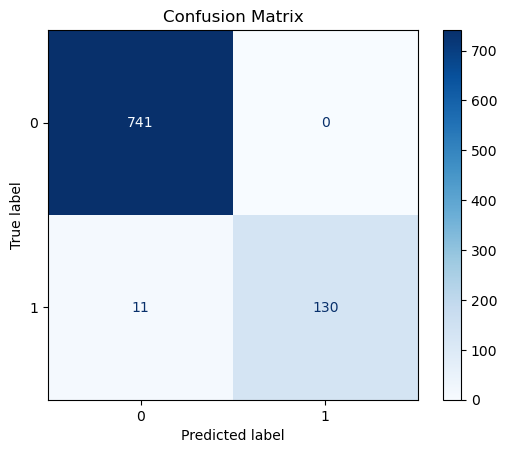

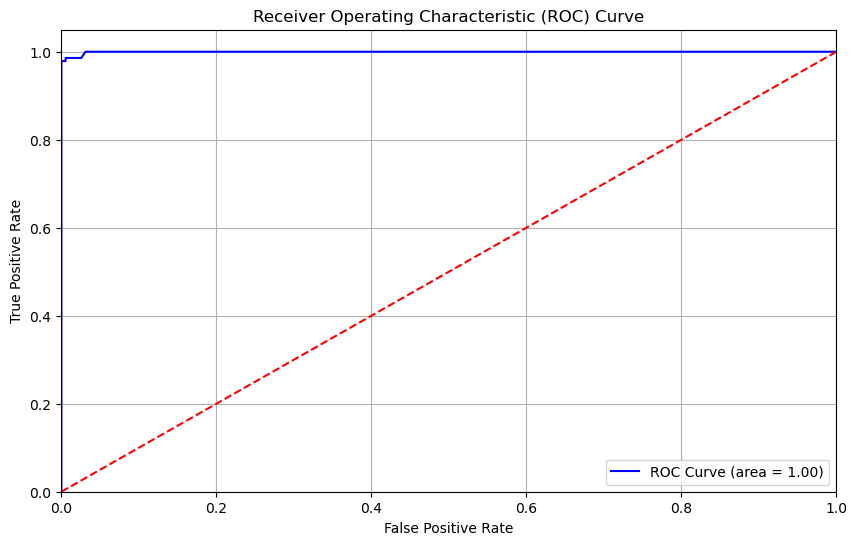

F1 Score with Best Parameters: 0.9594

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.92      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882



In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report, f1_score

# Step 1: Use the best parameters found from RandomizedSearchCV
best_params = random_search.best_params_

# Initialize the Random Forest model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Step 2: Fit the model on the training data with selected features
best_rf_model.fit(X_train_selected, y_train)

# Step 3: Make predictions on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Step 4: Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 5: Calculate ROC curve and AUC
y_prob = best_rf_model.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 6: Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 7: Measure performance using F1 score and classification report
print(f"F1 Score with Best Parameters: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# 10. Cross-Validation in Model Evaluation

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is particularly useful for assessing how the results of a statistical analysis will generalize to an independent dataset. The primary goal of cross-validation is to ensure that the model performs well on unseen data and to mitigate issues such as overfitting.

## Importance of Cross-Validation

1. **Robust Performance Estimation**: By using multiple subsets of the data for training and validation, cross-validation provides a more reliable estimate of model performance compared to a single train-test split. This helps in understanding how well the model is likely to perform on new, unseen data.

2. **Model Generalization**: Cross-validation helps in evaluating how well the model generalizes beyond the training dataset. It reduces the likelihood of overfitting by ensuring that the model is tested on different data points.

3. **Hyperparameter Tuning**: Cross-validation can be used during hyperparameter tuning to find the best combination of parameters that yield optimal performance across multiple folds.

## Method Used: Stratified K-Fold Cross-Validation

In our analysis, we employed **stratified k-fold cross-validation**, which is an enhancement of the regular k-fold cross-validation method. It ensures that each fold maintains the same proportion of target classes as the entire dataset, which is particularly important for imbalanced datasets. The steps are as follows:

1. **Data Splitting**: The dataset is divided into `k` equally sized folds (subsets), ensuring that each fold reflects the overall class distribution. This stratified approach prevents the model from being biased toward any class during training and evaluation.

2. **Model Training and Evaluation**: The model is trained on `k-1` folds and evaluated on the remaining fold. This process is repeated `k` times, with each fold serving as the validation set once.

3. **Performance Aggregation**: The performance metrics (in our case, F1 score) from each fold are averaged to provide a final performance estimate.

### Application in Our Random Forest Model

In our implementation:

- We initialized the Random Forest classifier with hyperparameters obtained from `RandomizedSearchCV`.
- We performed 5-fold stratified cross-validation (`cv=5`) on the training data using `cross_val_score`, which calculated the F1 score for each fold.
- The F1 scores were plotted to visualize model performance across different folds.
- The mean F1 score was calculated and interpreted to assess whether the model's performance was good, moderate, or poor.

By utilizing stratified cross-validation, we ensure that our Random Forest model performs robustly, even on imbalanced datasets, and is capable of generalizing well to new data, providing confidence in its predictive capabilities.



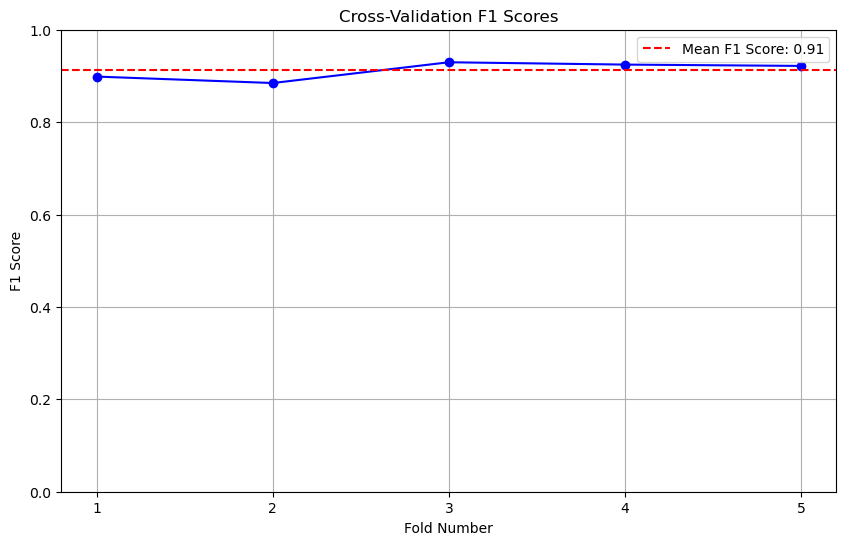

Mean Cross-Validation F1 Score: 0.9118
Good performance: The model has a high F1 score.
Test F1 Score: 0.9594
The model generalizes well to the test set.


In [69]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the Random Forest model with best parameters
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)

# Step 2: Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=5, scoring='f1', n_jobs=-1)

# Step 3: Fit the model on the entire training data with selected features
best_rf_model.fit(X_train_selected, y_train)

# Step 4: Predict on the test set
y_test_pred = best_rf_model.predict(X_test_selected)

# Step 5: Calculate the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)

# Step 6: Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation F1 Scores')
plt.xlabel('Fold Number')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid()
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean F1 Score: {cv_scores.mean():.2f}')
plt.legend()
plt.show()

# Step 7: Indicate whether the performance is good or bad on cross-validation scores
mean_f1_score = cv_scores.mean()
if mean_f1_score >= 0.75:
    performance_message = "Good performance: The model has a high F1 score."
elif mean_f1_score >= 0.5:
    performance_message = "Moderate performance: The model's F1 score is acceptable but could be improved."
else:
    performance_message = "Poor performance: The model has a low F1 score."

print(f"Mean Cross-Validation F1 Score: {mean_f1_score:.4f}")
print(performance_message)

# Step 8: Compare with the test set F1 score and check for overfitting
print(f"Test F1 Score: {test_f1_score:.4f}")

if test_f1_score < mean_f1_score - 0.1:
    overfitting_message = "Potential overfitting: The model performs significantly better on the training data than on the test set."
elif test_f1_score > mean_f1_score + 0.1:
    overfitting_message = "Potential underfitting: The model performs significantly worse on the training data than on the test set."
else:
    overfitting_message = "The model generalizes well to the test set."

print(overfitting_message)


# 11. Performance Analysis of Classifiers

In this section, we conduct a performance analysis of multiple classifiers to evaluate their effectiveness on our dataset. This analysis helps us determine which models perform well and are worth further tuning and training. The classifiers evaluated include Logistic Regression, Support Vector Classifier (SVC), Decision Tree, K-Nearest Neighbors (KNN), Gradient Boosting, Gaussian Naive Bayes, and the previously optimized Random Forest.

## Steps Involved

### 1. Model Evaluation
We define a function `evaluate_model` that performs the following tasks for each classifier:
- **Model Fitting**: Each model is trained on the scaled training data with selected features.
- **Predictions**: Predictions are made on the scaled test data.
- **Performance Metrics**: The F1 score and ROC AUC score are calculated to assess model performance.
- **Visualizations**: Confusion matrices and ROC curves are plotted to provide insights into each model's strengths and weaknesses.
- **Cross-Validation Scores**: Cross-validation is conducted to evaluate the model's performance across different folds of the training data.

### 2. Classifier Definitions
The following classifiers are included in the evaluation:
- **Logistic Regression**
- **Support Vector Classifier (SVC)**
- **Decision Tree**
- **K-Nearest Neighbors (KNN)**
- **Gradient Boosting**
- **Gaussian Naive Bayes**
- **Optimized Random Forest** (previously defined)

### 3. Results Interpretation
Each model's performance is evaluated using the defined function, with classification reports printed for detailed metrics such as precision, recall, F1 score, and support. The visualizations provide additional insights into model performance.

### 4. Conclusion
This performance analysis allows us to assess the effectiveness of various classifiers on our dataset. By analyzing their F1 scores and visualizations, we can identify which models perform well and may warrant further tuning or training for improved results.



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       741
           1       0.52      0.18      0.26       141

    accuracy                           0.84       882
   macro avg       0.69      0.57      0.59       882
weighted avg       0.81      0.84      0.81       882



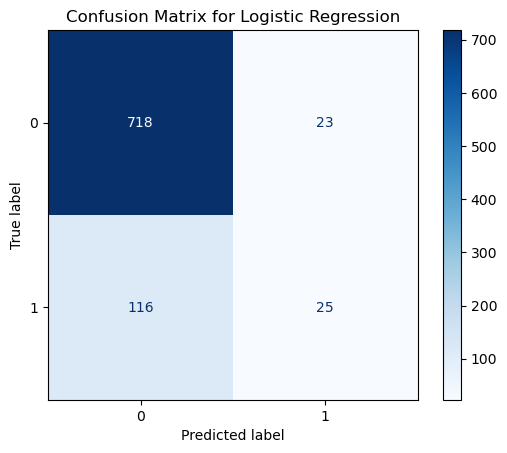

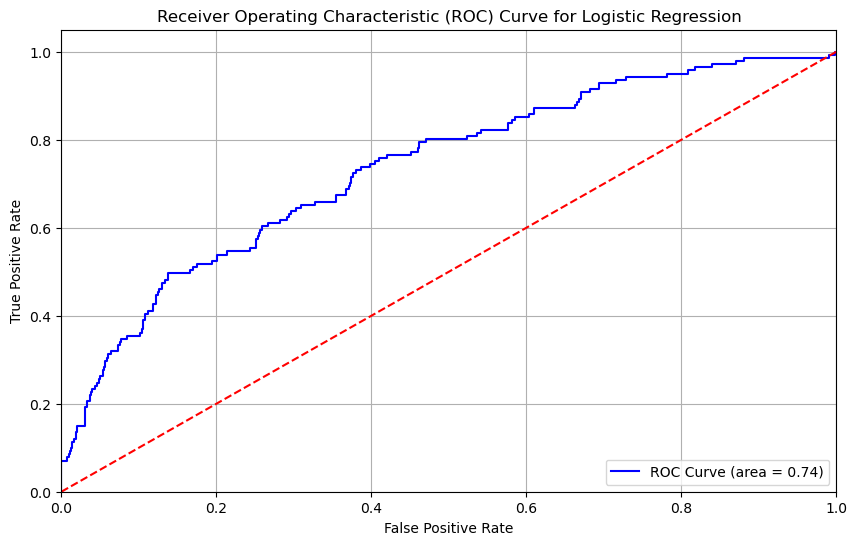

Cross-Validation F1 Scores for Logistic Regression: [0.26388889 0.29139073 0.24460432 0.36363636 0.29931973]


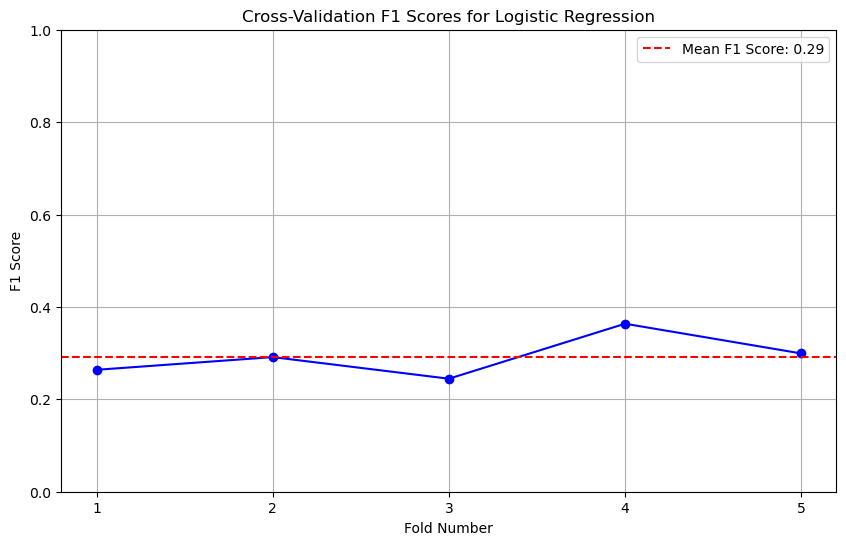


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       741
           1       0.91      0.37      0.53       141

    accuracy                           0.89       882
   macro avg       0.90      0.68      0.73       882
weighted avg       0.90      0.89      0.87       882



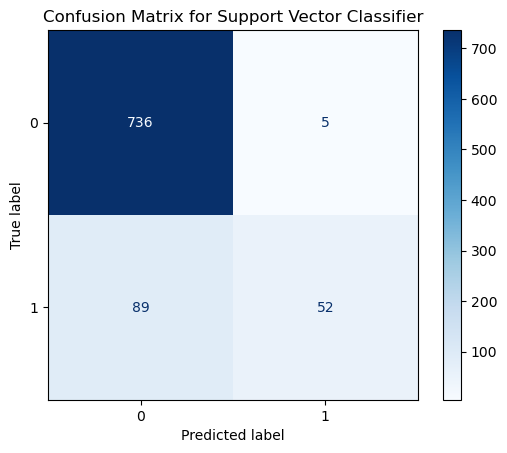

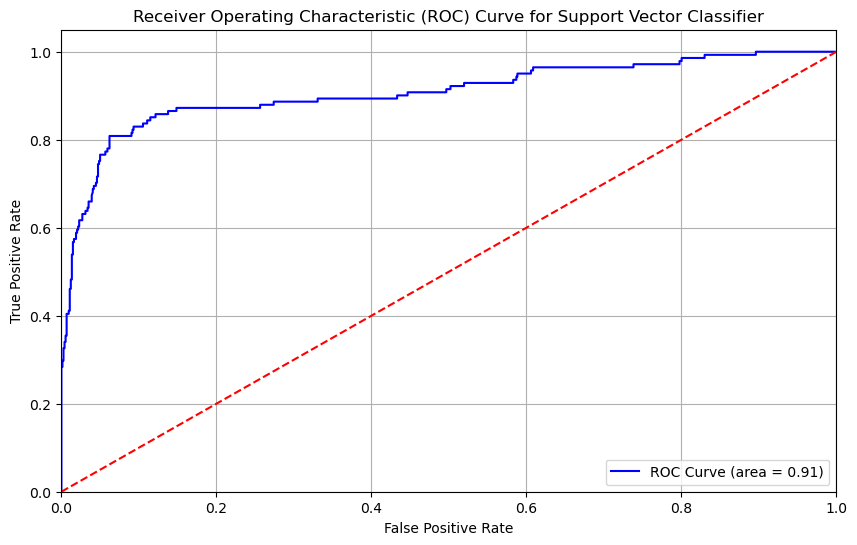

Cross-Validation F1 Scores for Support Vector Classifier: [0.37583893 0.40251572 0.48717949 0.50322581 0.42666667]


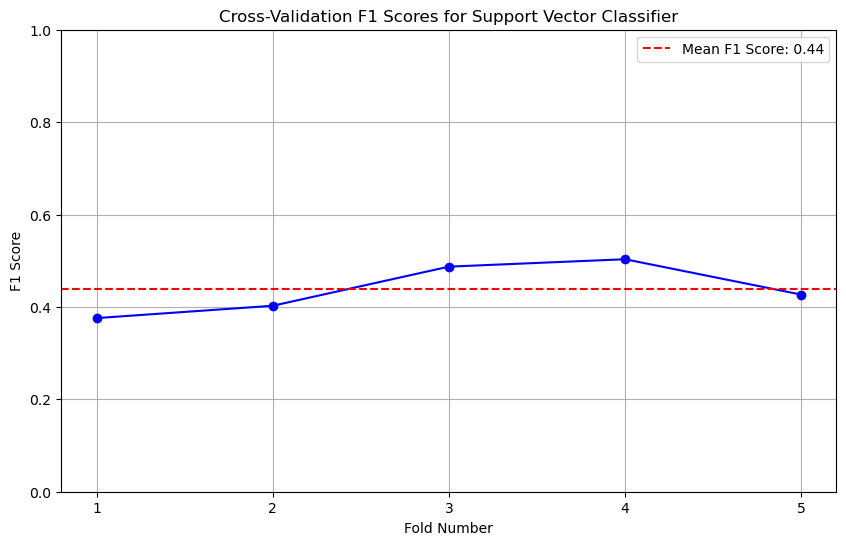


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       741
           1       0.98      0.91      0.95       141

    accuracy                           0.98       882
   macro avg       0.98      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882



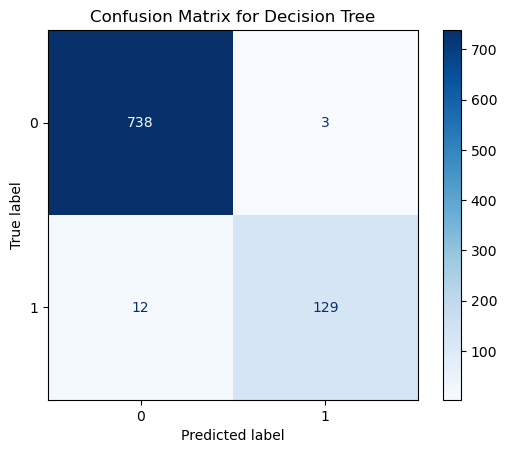

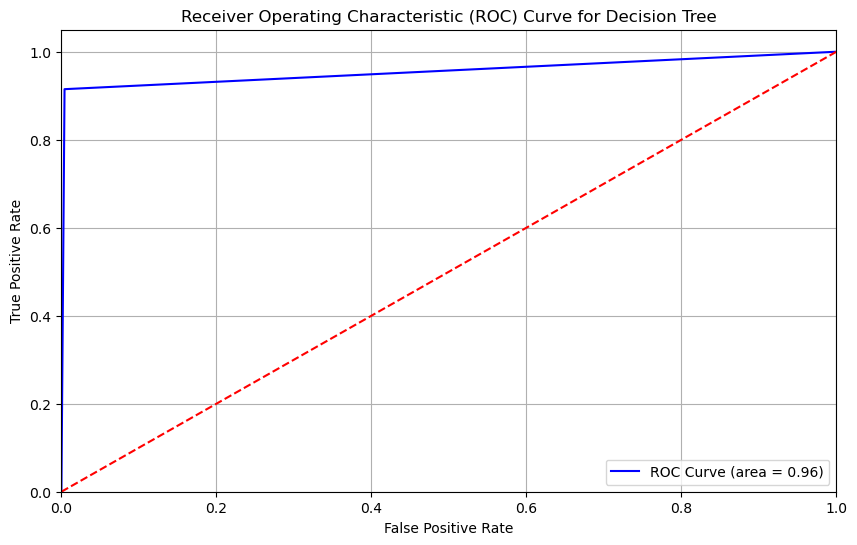

Cross-Validation F1 Scores for Decision Tree: [0.85585586 0.83982684 0.88412017 0.89082969 0.84581498]


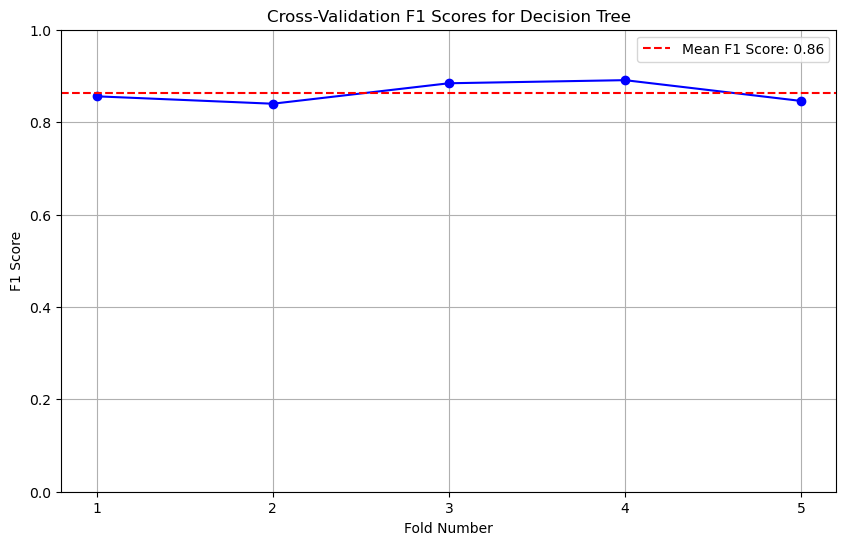


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       741
           1       0.62      0.35      0.45       141

    accuracy                           0.86       882
   macro avg       0.75      0.66      0.69       882
weighted avg       0.84      0.86      0.85       882



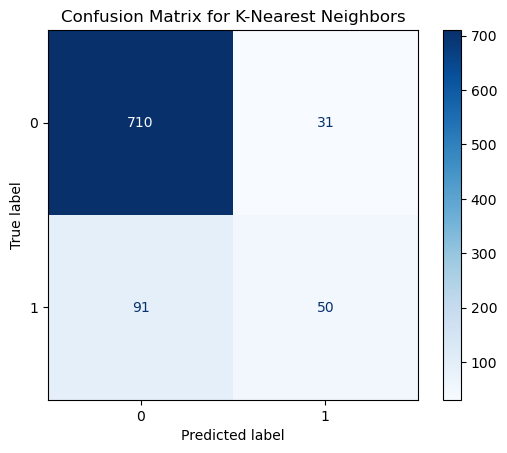

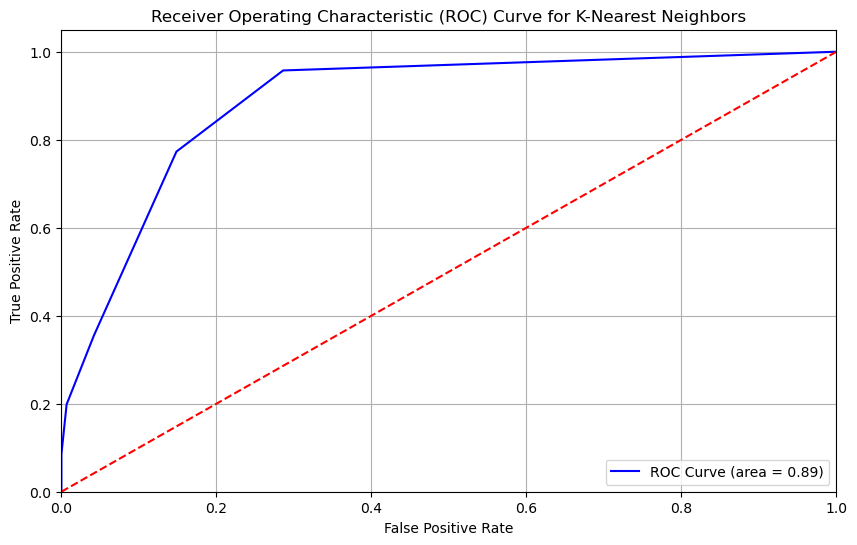

Cross-Validation F1 Scores for K-Nearest Neighbors: [0.39766082 0.46067416 0.53333333 0.48351648 0.45086705]


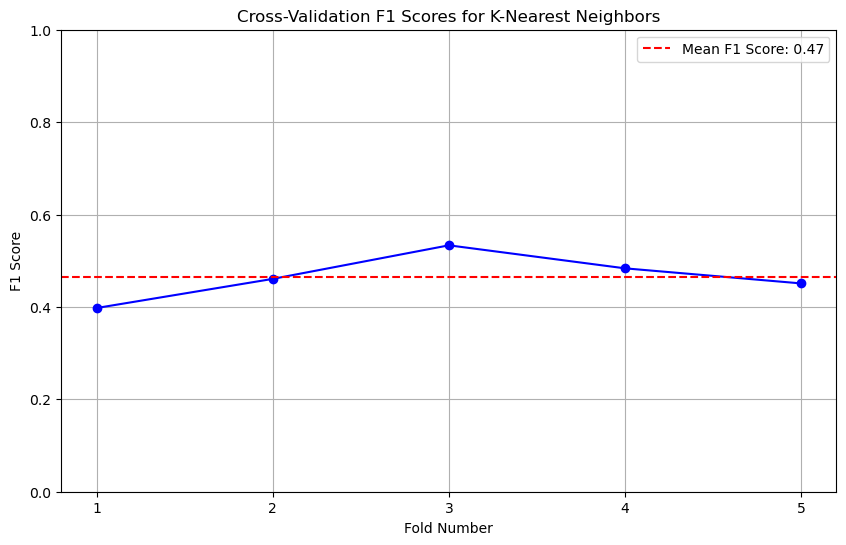


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       741
           1       0.83      0.31      0.45       141

    accuracy                           0.88       882
   macro avg       0.86      0.65      0.69       882
weighted avg       0.87      0.88      0.86       882



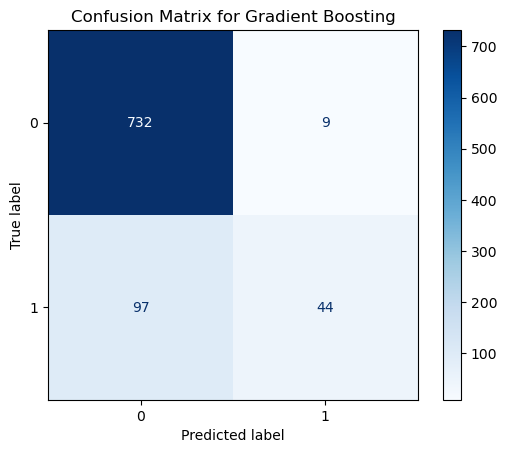

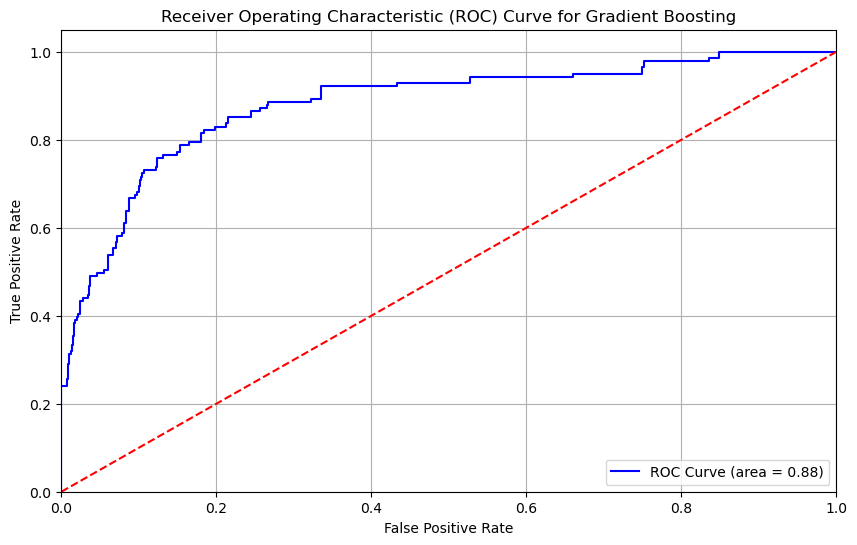

Cross-Validation F1 Scores for Gradient Boosting: [0.44585987 0.42857143 0.45454545 0.56626506 0.51190476]


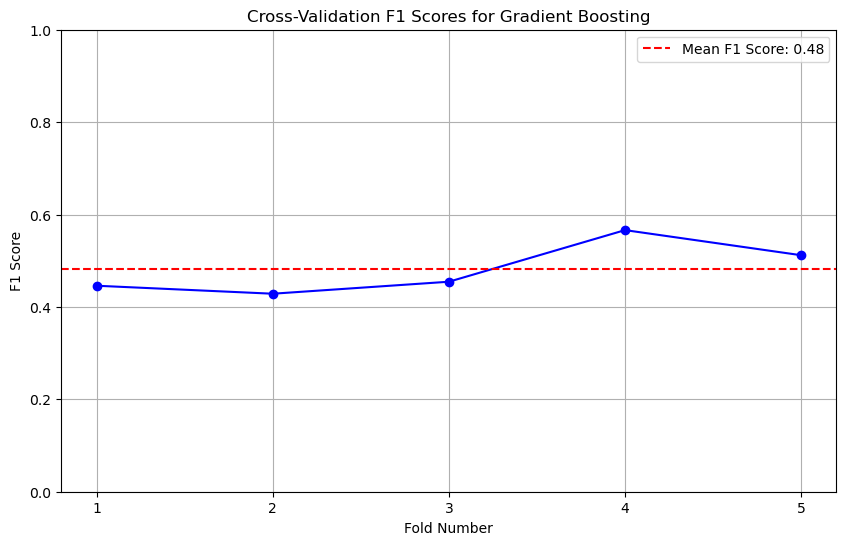


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       741
           1       0.33      0.37      0.35       141

    accuracy                           0.78       882
   macro avg       0.60      0.61      0.61       882
weighted avg       0.79      0.78      0.78       882



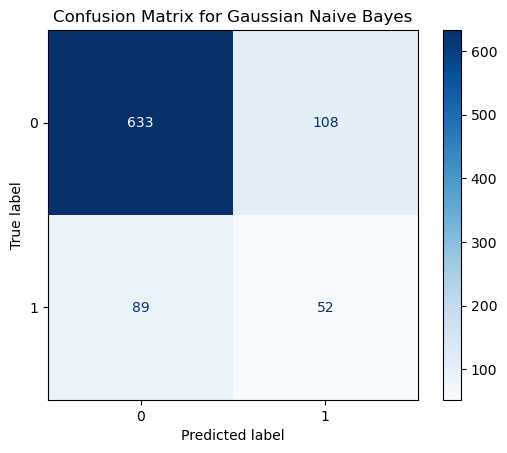

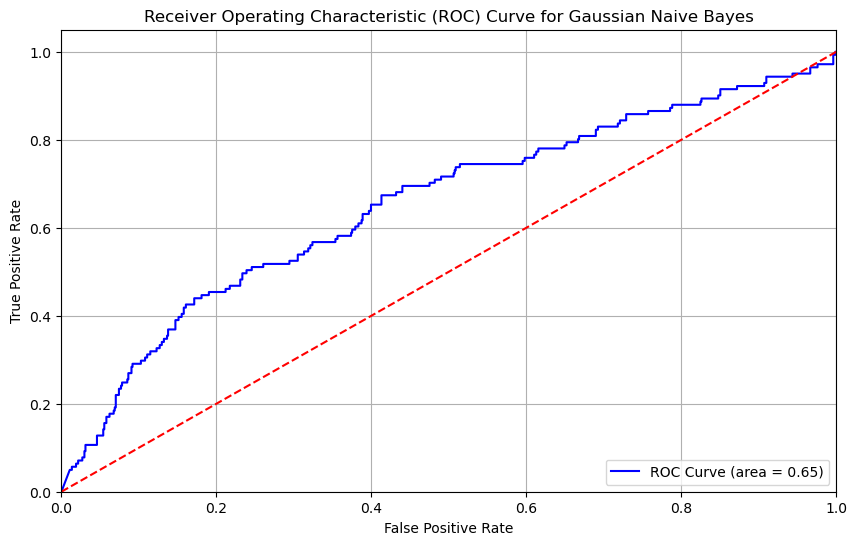

Cross-Validation F1 Scores for Gaussian Naive Bayes: [0.43103448 0.38888889 0.43037975 0.37547893 0.38135593]


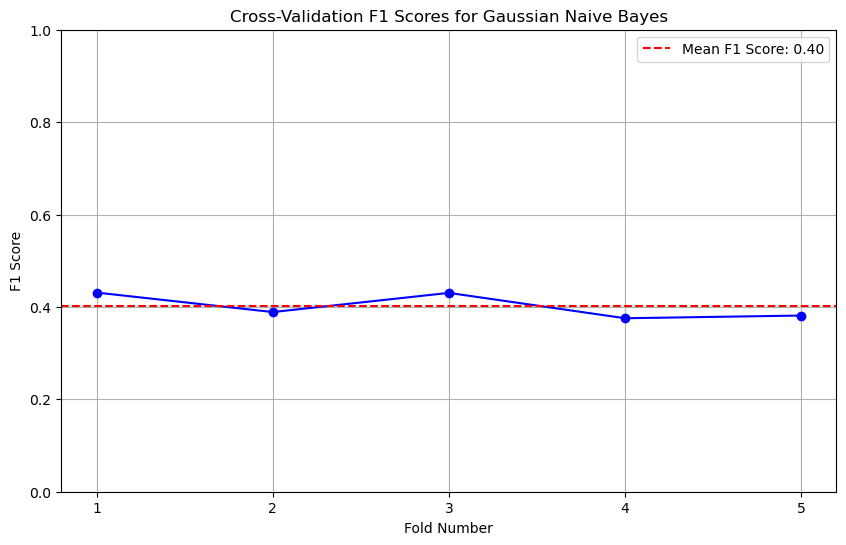


Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       741
           1       1.00      0.91      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.97       882
weighted avg       0.99      0.99      0.99       882



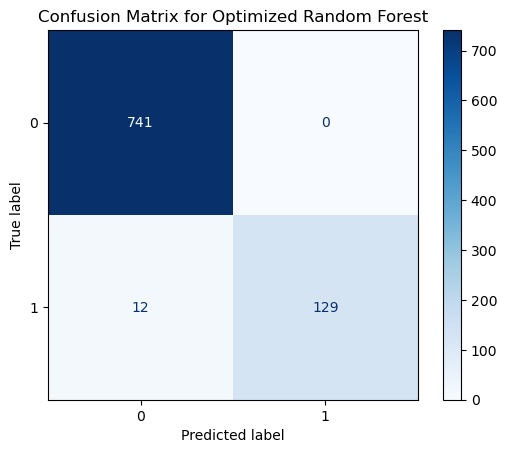

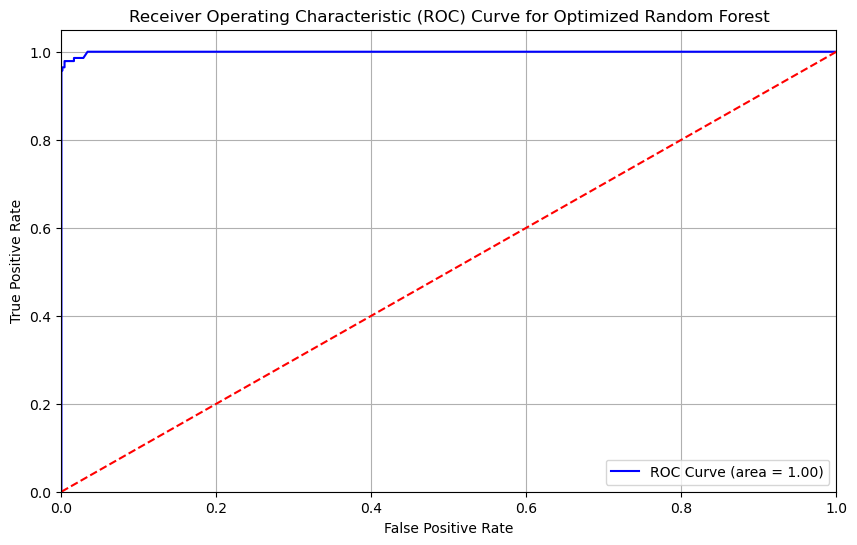

Cross-Validation F1 Scores for Optimized Random Forest: [0.90384615 0.88461538 0.93953488 0.93953488 0.90995261]


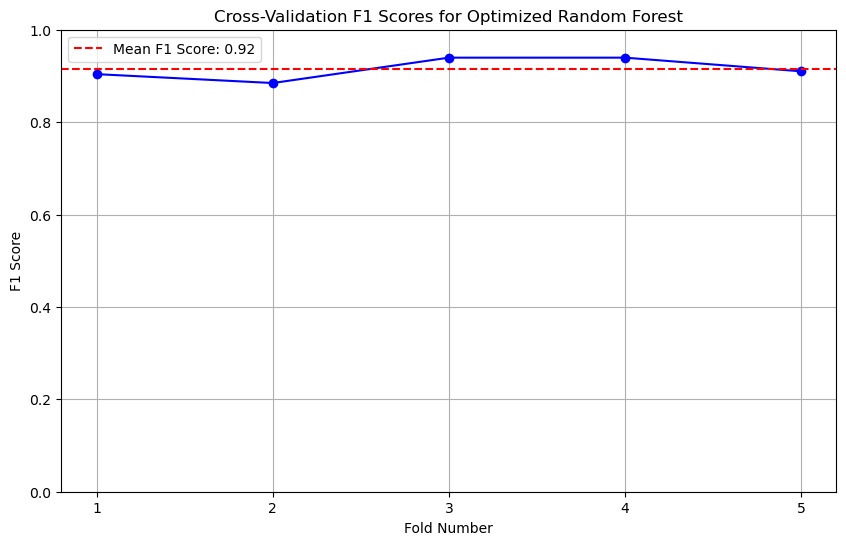

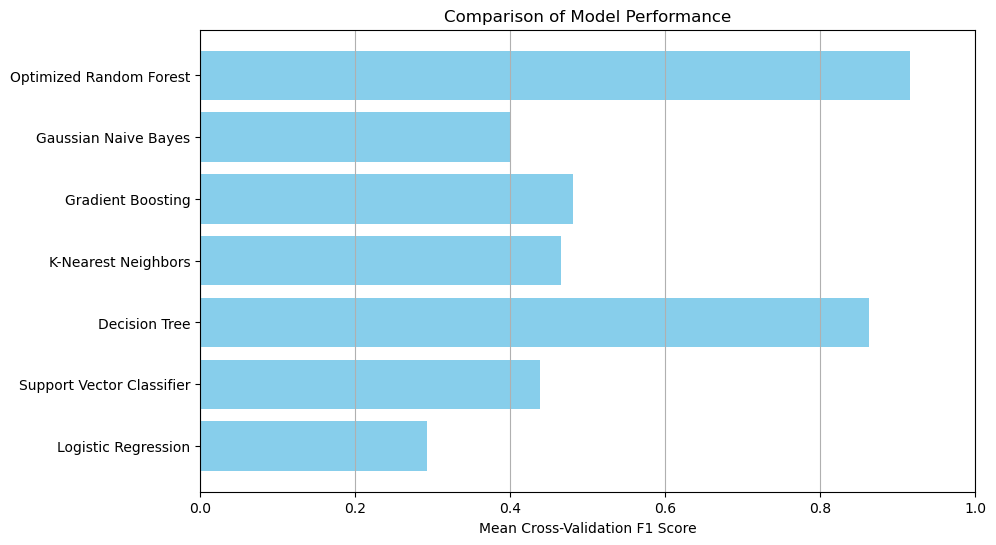

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Define a function to evaluate and visualize model performance
def evaluate_model(model, model_name):
    # Fit the model on the scaled training data with selected features
    model.fit(X_train_selected, y_train)
    
    # Make predictions on the test set with selected features
    y_pred = model.predict(X_test_selected)
    
    # Calculate F1 score for the current model
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC AUC score
    y_prob = model.predict_proba(X_test_selected)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Perform cross-validation and plot results
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1', n_jobs=-1)
    
    # Print cross-validation results interpretation
    print(f"Cross-Validation F1 Scores for {model_name}: {cv_scores}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue')
    plt.title(f'Cross-Validation F1 Scores for {model_name}')
    plt.xlabel('Fold Number')
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
    plt.xticks(range(1, len(cv_scores) + 1))
    plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean F1 Score: {cv_scores.mean():.2f}')
    plt.legend()
    plt.grid()
    plt.show()
    
    return cv_scores.mean()  # Return mean F1 score for comparison

# Define models to evaluate (including existing best Random Forest)
models_to_evaluate = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

# Store mean F1 scores for comparison
mean_f1_scores = {}

# Evaluate each model using the defined function and collect mean F1 scores
for name, model in models_to_evaluate.items():
    mean_f1 = evaluate_model(model, name)
    mean_f1_scores[name] = mean_f1

# Evaluate the existing best Random Forest model as well
mean_forest_f1 = evaluate_model(best_model, "Optimized Random Forest")
mean_f1_scores["Optimized Random Forest"] = mean_forest_f1

# Plotting the performance comparison of models based on mean F1 scores
plt.figure(figsize=(10, 6))
plt.barh(list(mean_f1_scores.keys()), list(mean_f1_scores.values()), color='skyblue')
plt.xlabel('Mean Cross-Validation F1 Score')
plt.title('Comparison of Model Performance')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()


## 12. Interpretation of Results

In this section, we interpret the results from our best-performing model to estimate how many employees might leave the organization in the coming year.

### 1. Predicting Employee Turnover
Using the trained model, we predict the probabilities of each employee leaving based on their features. By applying a threshold (e.g., 0.5), we classify employees as "likely to leave" or "unlikely to leave."

### 2. Estimating Turnover Rates
We calculate:
- The total number of employees in the dataset.
- The number of employees predicted to leave.
- The percentage of employees predicted to leave compared to the total.

### 3. Insights from Predictions
The results provide valuable insights into potential turnover rates, enabling HR teams to proactively address issues and implement targeted retention strategies.

### 4. Conclusion
By interpreting these predictions, organizations can make informed decisions regarding workforce planning and talent retention efforts.


In [73]:
# Assuming 'best_model' is your trained model and X_test_selected contains the test features

# Step 1: Predict probabilities of leaving
y_prob = best_model.predict_proba(X_test_selected)[:, 1]

# Step 2: Set a threshold for classification (e.g., 0.5)
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Step 3: Count the number of employees predicted to leave
num_employees = len(y_pred)
num_leaving = np.sum(y_pred)  # Count of employees predicted to leave

# Step 4: Calculate the percentage of employees predicted to leave
percentage_leaving = (num_leaving / num_employees) * 100

# Step 5: Display results
print(f"Total Employees: {num_employees}")
print(f"Predicted Employees Likely to Leave: {num_leaving}")
print(f"Percentage of Employees Predicted to Leave: {percentage_leaving:.2f}%")


Total Employees: 882
Predicted Employees Likely to Leave: 130
Percentage of Employees Predicted to Leave: 14.74%


##### Bibliography

1. Lo, K., et al. (2023). The Semantic Reader Project: Augmenting Scholarly Documents through AI-Powered Interactive Reading Interfaces.

2. Naveed, M., et al. (2023). The Future of Natural History Transcription: Navigating AI advancements with VoucherVision and the Specimen Label Transcription Project (SLTP).

3. Greenbaum, D., et al. (2018). The Datalex Project: History and Bibliography.

4. Ioannidis, A., et al. (2023). BabbleNewt: A Simplified, Consistent, and Interoperable Reference Citation Format for Bibliographic Metadata.

5. Anonymous. (2023). Generation of Smart Text Book using AI.

6. Anonymous. (2024). Generative AI Project Assistant.

7. Anonymous. (2024). The Role of Innovation Intermediaries in Bridging the AI Talent Gap.

8. Anonymous. (2024). Practical Software Development: Leveraging AI for Precise Cost Estimation in Lump-Sum EPC Projects.
